You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). Build Linear Regression Model and evaluate it with measuring different errors.
Dataset : IceCreamData.csv


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('./IceCreamData.csv')
df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [54]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


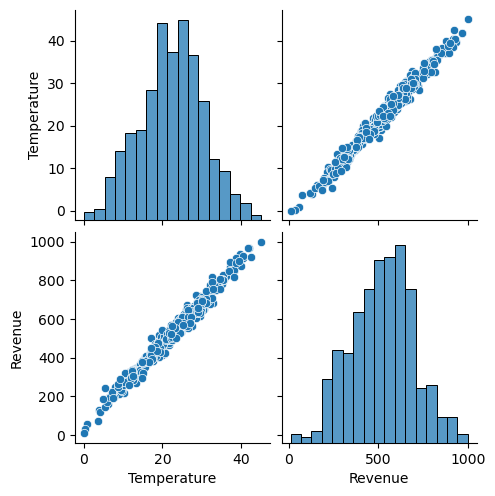

In [56]:
sns.pairplot(df)

In [57]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [67]:
x = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
c = model.intercept_
c

46.882631561049664

In [71]:
coeff = model.coef_
coeff

array([21.37475972])

In [73]:
Revenue = 24.566884
Temperature = model.predict([[Revenue]])
Temperature

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([571.99387401])

In [74]:
y_true = y_test
y_pred = model.predict(x_test)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [76]:
print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squarred error: {rmse:.2f}")
print(f"r2 score = {r2:.2f}")

mean absolute error: 20.27
mean squared error: 647.62
root mean squarred error: 25.45
r2 score = 0.98
